In [205]:
from pycoingecko import CoinGeckoAPI
from datetime import timezone
from datetime import datetime
import altair as alt
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
coingecko = CoinGeckoAPI()
alt.renderers.enable('default')


def datetime_to_unix(year, month, day):
    dt = datetime(year, month, day)
    timestamp = (dt - datetime(1970, 1, 1)).total_seconds()
    return timestamp

def unix_to_datetime(unix_time):
    ts = int(unix_time/1000 if len(str(unix_time)) > 10 else unix_time) # /1000 handles milliseconds
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %l:%M%p').lower()

def get_frame(crypto):
    crypto_data = coingecko.get_coin_market_chart_by_id(crypto,vs_currency='usd',days='365')
    return crypto_data

def build_chart(result,name):
    time = [ unix_to_datetime(i[0]) for i in result['prices'] ]
    p_array = np.array(result['prices'])
    price = p_array[:,1]

    v_array = np.array(result['total_volumes'])
    volume = v_array[:,1]

    df = pd.DataFrame({'time':time, 'price':price, 'volume':volume})

    # Create y-axis
    base = alt.Chart(df).encode(x='time:O')
    # Create bars 
    bar = base.mark_bar().encode(
        alt.Y(
            'volume:Q'
        )
    )
    # Create line
    line =  base.mark_line(color='orange').encode(
        alt.Y(
            'price:Q',
            axis=alt.Axis(titleColor='#5276A7'),
        )
    )

    # Build the chart
    chart = alt.layer(bar, line).resolve_scale(y='independent').properties(width=600, title=name +' Price & Volume')

    chart.configure_title(
        fontSize=20,
        font='Helvetica',
        color='black',
        offset=10
    )
    
    return chart

def cluster(bitcoin_frame,ethereum_frame,cardano_frame,xrp_frame,solana_frame,polkadot_frame,dogecoin_frame,link_frame,sushi_frame):
    time = [ unix_to_datetime(i[0]) for i in bitcoin_frame['total_volumes'] ]
    bitcoin_v_array = np.array(bitcoin_frame['total_volumes'])
    ethereum_v_array = np.array(ethereum_frame['total_volumes'])
    cardano_v_array = np.array(cardano_frame['total_volumes'])
    xrp_v_array = np.array(xrp_frame['total_volumes'])
    solana_v_array = np.array(solana_frame['total_volumes'])
    polkadot_v_array = np.array(polkadot_frame['total_volumes'])
    dogecoin_v_array = np.array(dogecoin_frame['total_volumes'])
    link_v_array = np.array(link_frame['total_volumes'])
    sushi_v_array = np.array(sushi_frame['total_volumes'])
    bitcoin_time = bitcoin_v_array[:,0]
    bitcoin_volume = bitcoin_v_array[:,1]
    ethereum_volume = ethereum_v_array[:,1]
    cardano_volume = cardano_v_array[:,1]
    xrp_volume = xrp_v_array[:,1]
    solana_volume = solana_v_array[:,1]
    polkadot_volume = polkadot_v_array[:,1]
    dogecoin_volume = dogecoin_v_array[:,1]
    link_volume = link_v_array[:,1]
    sushi_volume = sushi_v_array[:,1]
    df = pd.DataFrame({'time':bitcoin_time, 'bitcoin_volume':bitcoin_volume, 'ethereum_volume':ethereum_volume,'cardano_volume':cardano_volume,'xrp_volume':xrp_volume,'solana_volume':solana_volume,'polkadot_volume':polkadot_volume,'dogecoin_volume':dogecoin_volume,'link_volume':link_volume,'sushi_volume':sushi_volume})
    kmeans = KMeans(n_clusters=5).fit(df)
    y = kmeans.fit_predict(df[['time', 'bitcoin_volume', 'ethereum_volume', 'cardano_volume','xrp_volume','solana_volume','polkadot_volume','dogecoin_volume','link_volume']])
    df['Cluster'] = y
    return df

In [177]:
# Build bitcoin chart
bitcoin_frame = get_frame('bitcoin')
chart = build_chart(bitcoin_result,'Bitcoin')
chart

alt.LayerChart(...)

In [178]:
# Build etheruem chart
ethereum_frame = get_frame('ethereum')
build_chart(ethereum_result,'Ethereum')

alt.LayerChart(...)

In [179]:
cardano_frame = get_frame('cardano')
build_chart(cardano_result, 'Cardano')

alt.LayerChart(...)

In [180]:
xrp_frame = get_frame('ripple')
build_chart(xrp_result, 'Ripple')

alt.LayerChart(...)

In [181]:
solana_frame = get_frame('solana')
build_chart(solana_result,'Solana')

alt.LayerChart(...)

In [182]:
polkadot_frame = get_frame('polkadot')
build_chart(polkadot_result,'Polkadot')

alt.LayerChart(...)

In [183]:
dogecoin_frame = get_frame('dogecoin')
build_chart(dogecoin_result,'Dogecoin')

alt.LayerChart(...)

In [184]:
link_frame = get_frame('chainlink')
build_chart(link_result,'Chainlink')

alt.LayerChart(...)

In [185]:
ohm_frame = get_frame('olympus')
build_chart(ohm_result,'Olympus')

alt.LayerChart(...)

In [186]:
sushi_frame = get_frame('sushi')
build_chart(sushi_result,'Sushi')

alt.LayerChart(...)

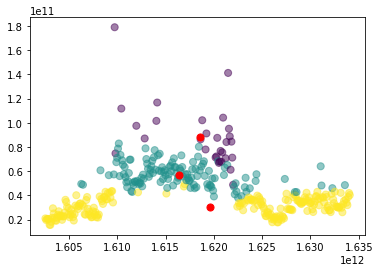

In [215]:
df = cluster(bitcoin_frame,ethereum_frame,cardano_frame,xrp_frame,solana_frame,polkadot_frame,dogecoin_frame,link_frame,sushi_frame)
kmeans = KMeans(n_clusters=3).fit(df)
plt.scatter(df['time'], df['bitcoin_volume'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
'time', 'bitcoin_volume'
'time':bitcoin_time, 'bitcoin_volume':bitcoin_volume, 'ethereum_volume':ethereum_volume,'cardano_volume':cardano_volume,'xrp_volume':xrp_volume,'solana_volume':solana_volume,'polkadot_volume':polkadot_volume,'dogecoin_volume':dogecoin_volume,'link_volume':link_volume,'sushi_volume':sushi_volume


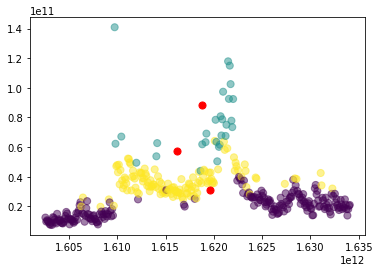

In [216]:
df = cluster(bitcoin_frame,ethereum_frame,cardano_frame,xrp_frame,solana_frame,polkadot_frame,dogecoin_frame,link_frame,sushi_frame)
kmeans = KMeans(n_clusters=3).fit(df)
plt.scatter(df['time'], df['ethereum_volume'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

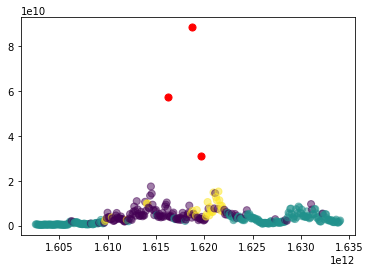

In [217]:
df = cluster(bitcoin_frame,ethereum_frame,cardano_frame,xrp_frame,solana_frame,polkadot_frame,dogecoin_frame,link_frame,sushi_frame)
kmeans = KMeans(n_clusters=3).fit(df)
plt.scatter(df['time'], df['cardano_volume'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

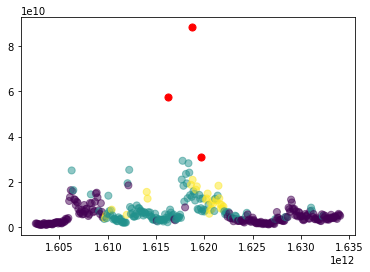

In [218]:
df = cluster(bitcoin_frame,ethereum_frame,cardano_frame,xrp_frame,solana_frame,polkadot_frame,dogecoin_frame,link_frame,sushi_frame)
kmeans = KMeans(n_clusters=3).fit(df)
plt.scatter(df['time'], df['solana_volume'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


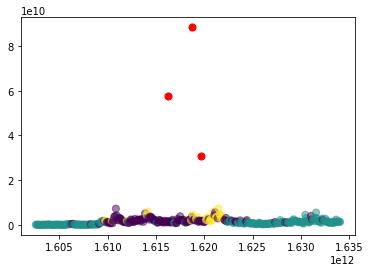

In [219]:
df = cluster(bitcoin_frame,ethereum_frame,cardano_frame,xrp_frame,solana_frame,polkadot_frame,dogecoin_frame,link_frame,sushi_frame)
kmeans = KMeans(n_clusters=3).fit(df)
plt.scatter(df['time'], df['polkadot_volume'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

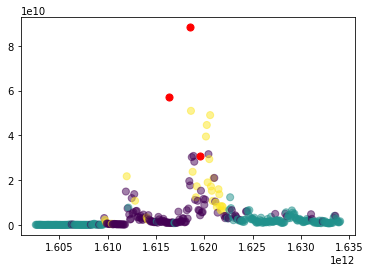

In [220]:
df = cluster(bitcoin_frame,ethereum_frame,cardano_frame,xrp_frame,solana_frame,polkadot_frame,dogecoin_frame,link_frame,sushi_frame)
kmeans = KMeans(n_clusters=3).fit(df)
plt.scatter(df['time'], df['dogecoin_volume'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

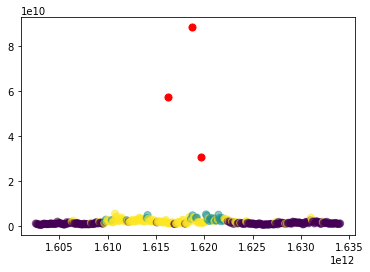

In [221]:
df = cluster(bitcoin_frame,ethereum_frame,cardano_frame,xrp_frame,solana_frame,polkadot_frame,dogecoin_frame,link_frame,sushi_frame)
kmeans = KMeans(n_clusters=3).fit(df)
plt.scatter(df['time'], df['link_volume'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

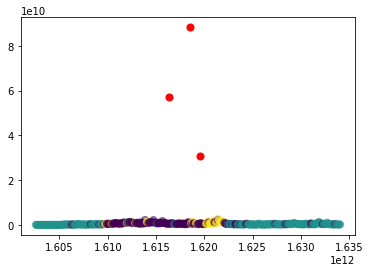

In [222]:
df = cluster(bitcoin_frame,ethereum_frame,cardano_frame,xrp_frame,solana_frame,polkadot_frame,dogecoin_frame,link_frame,sushi_frame)
kmeans = KMeans(n_clusters=3).fit(df)
plt.scatter(df['time'], df['sushi_volume'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()